In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
bank=pd.read_csv("banknote.csv")
bank

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# DATA ANALYSIS

In [3]:
bank.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bank.tail()

,variance,skewness,kurtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
kurtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
bank.shape

(1372, 5)

In [7]:
bank.dtypes

variance    float64
skewness    float64
kurtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
bank.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
bank.skew()

variance   -0.149388
skewness   -0.394103
kurtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

# VISUALIZATION

In [10]:
bank.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

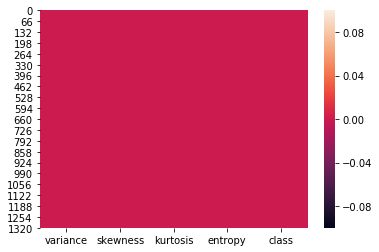

In [11]:
sns.heatmap(bank.isnull())

In [12]:
bank.corr()

,variance,skewness,kurtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
kurtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


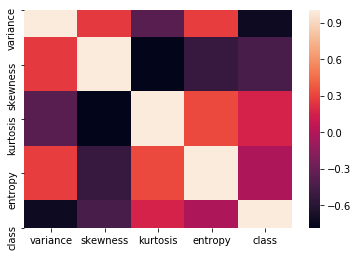

In [13]:
sns.heatmap(bank.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8D4F5EFC8>,
      dtype=object)

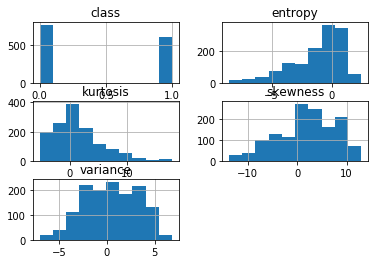

In [14]:
bank.hist()

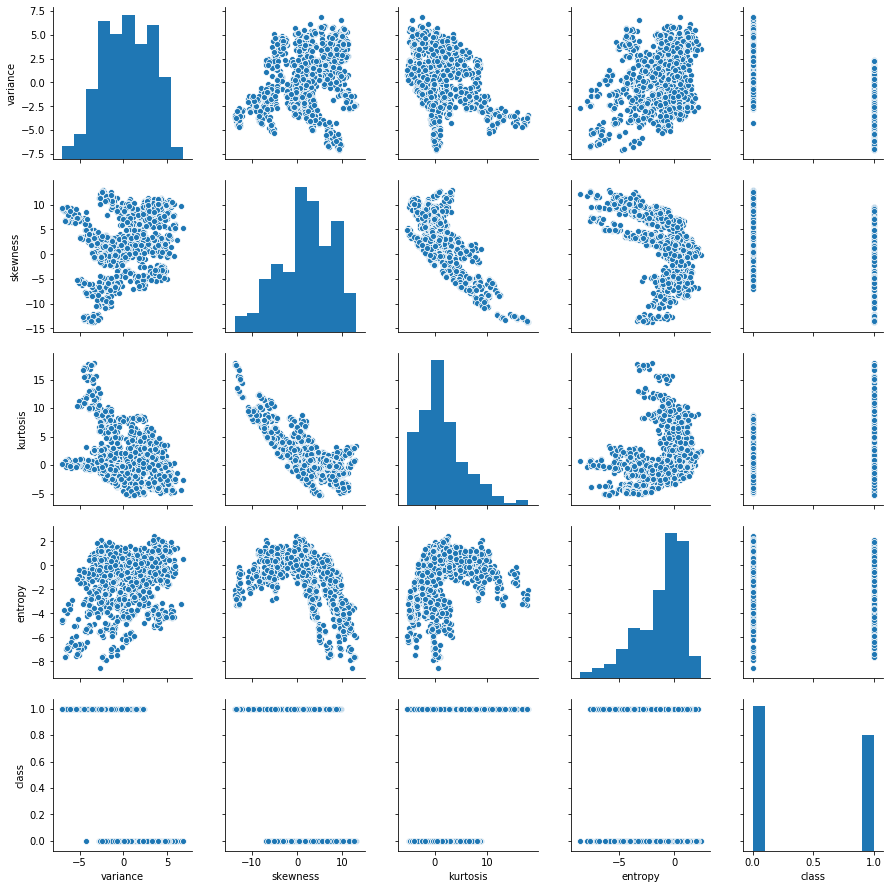

In [15]:
sns.pairplot(bank)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8D804EBC8>,
      dtype=object)

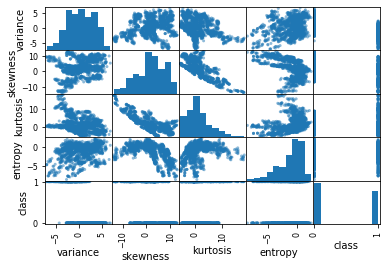

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(bank)

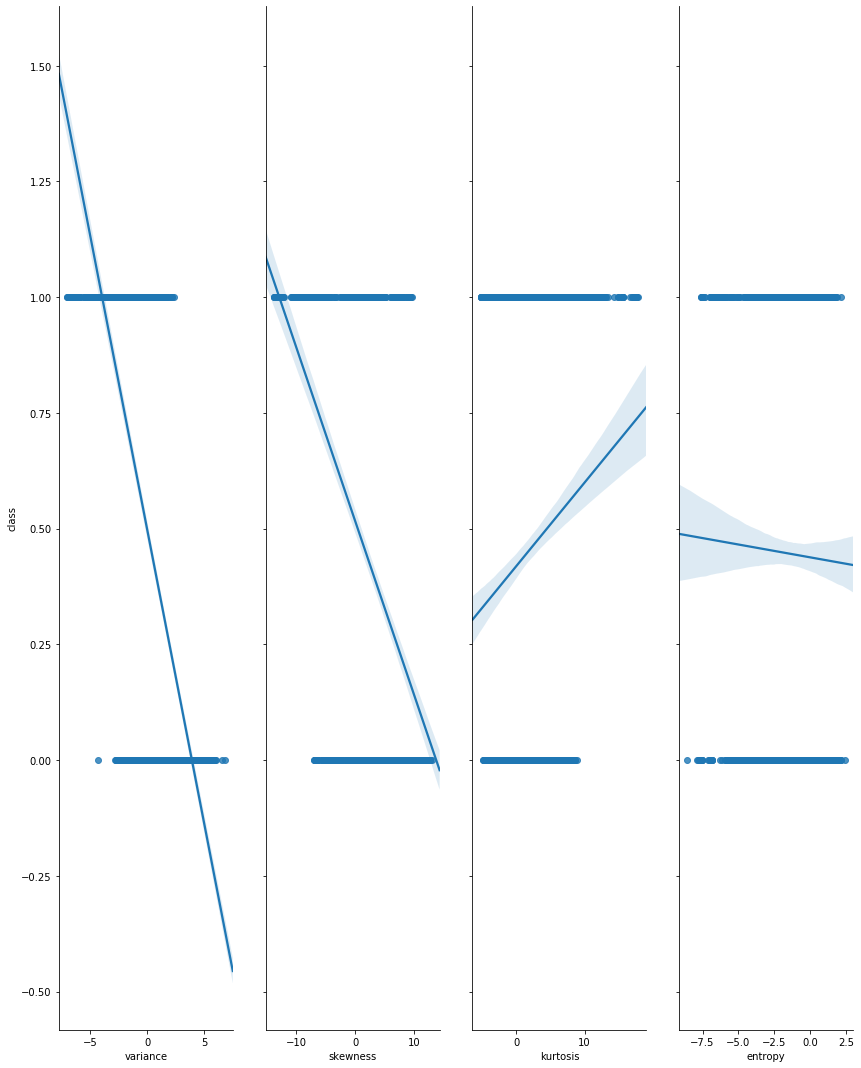

In [17]:
sns.pairplot(bank,x_vars=['variance','skewness','kurtosis','entropy'], y_vars="class",kind="reg",size=15,aspect=0.2)

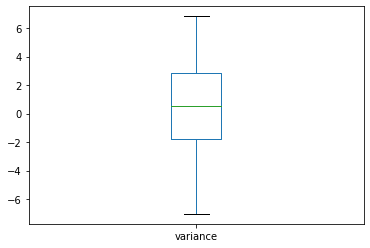

In [18]:
#Univariate plots or checking outliers
bank['variance'].plot.box()

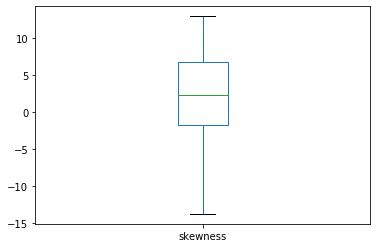

In [19]:
bank['skewness'].plot.box()

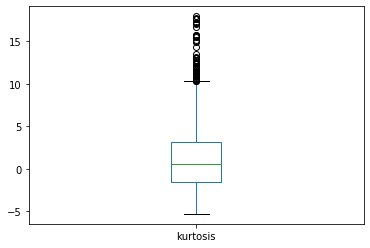

In [20]:
bank['kurtosis'].plot.box()

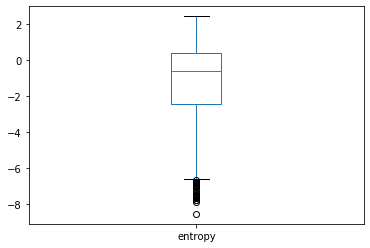

In [21]:
bank['entropy'].plot.box()

# DATA CLEANING

In [22]:
bank.isnull()

,variance,skewness,kurtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


In [23]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(bank))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [24]:
threshold=3
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [25]:
bank_new=bank[(z<3).all(axis=1)]
bank_new

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1


In [26]:
bank.shape

(1372, 5)

In [27]:
bank_new.shape

(1336, 5)

In [28]:
bank.skew()

variance   -0.149388
skewness   -0.394103
kurtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING

In [29]:
x=bank_new.drop('class',axis=1)
x

,variance,skewness,kurtosis,entropy
0,3.62160,8.66610,-2.80730,-0.44699
1,4.54590,8.16740,-2.45860,-1.46210
2,3.86600,-2.63830,1.92420,0.10645
3,3.45660,9.52280,-4.01120,-3.59440
4,0.32924,-4.45520,4.57180,-0.98880
...,...,...,...,...
1366,-2.41000,3.74330,-0.40215,-1.29530
1367,0.40614,1.34920,-1.45010,-0.55949
1368,-1.38870,-4.87730,6.47740,0.34179
1370,-3.56370,-8.38270,12.39300,-1.28230


In [33]:
y=bank_new['class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1370    1
1371    1
Name: class, Length: 1336, dtype: int64

# Apply Model and Algorithms¶

In [34]:
#finding the best score at best random state value
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=22)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1002, 4)
(1002,)
(334, 4)
(334,)


In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [40]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='accuracy'
# Spot Check Algorithms
models = []
models.append(('lr', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('svc',SVC()))
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=22)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lr: 0.986010 (0.006639)
KNN: 0.999000 (0.003000)
dtc: 0.982040 (0.007473)
rfc: 0.982020 (0.010785)
gbc: 0.993010 (0.008997)
svc: 1.000000 (0.000000)


In [41]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# Build parameter grid
params= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly']}
# Build the model
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=22)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.778443 (0.047157) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.998004 (0.005995) with: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
0.993014 (0.007802) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.989022 (0.012200) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
0.985030 (0.014993) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.920160 (0.049932) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
0.962076 (0.014043) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.559880 (0.049631) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
0.559880 (0.049631) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.559880 (0.049631) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}
0.999002 (0.002997) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.997006 (0.004580) with: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
1.000000 (0.000000) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.988024 (0.009798) with: {'C': 1, 'gamma': 0.1, 'k

In [43]:
from sklearn.model_selection import cross_val_predict
sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [1. 1. 1. 1. 1.]
Mean Scores 1.0
Standard Deviation 0.0
Y Prediction values
[0 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      1.00      1.00       585

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



1.0

In [44]:
data1=pd.DataFrame({"Actual":y,"Predicted":y_pred})
data1

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1366,1,1
1367,1,1
1368,1,1
1370,1,1


In [45]:
#Save the model
from sklearn.externals import joblib
joblib.dump(sv,"bank_note.pkl")

['bank_note.pkl']